In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 중심을 대표하는 값
import numpy as np

# 산술평균: 모든 자료를 합한 후 전체 자료 수로 나누어 계산하는 일반적인 평균
data = [30,71,20,62,91]
mean_value = np.mean(data)
print(mean_value)

54.8


In [ ]:
# 기하평균: N개의 자료에 대해 관측치를 곱한 후 n 제곱근으로 표현
from scipy.stats import hmean, gmean
gmean(data)

np.float64(47.44260595430201)

In [ ]:
# 조화평균: 각 요소의 역수의 산술푱균을 구한 후 다시 역수를 취하는 형태로 표현
hmean(data)

np.float64(40.14907073008576)

In [ ]:
# 가중평균: 표본의 원소들의 값에 가중치를 부여하여 계산한 평균
# 모든 원소들의 값이 동일한 중요도를 가지지 않을 때 사용
# 가격과 개수
price = [5000,9000]
count = [8,2]

np.average(price,weights = count)

np.float64(5800.0)

In [ ]:
# 중앙값: 자료를 크기 순으로 나열했을 때 가운데에 위치하는 값
# 이상치의 영향을 덜 받음

data = [10, 20, 30, 40, 50, 60]
median_value = np.median(data)
print(median_value)  # (30+35)/2

35.0


In [17]:
# 백분위수

score = [65,75,80,85,90]
p25 = np.percentile(score,25)
p50 = np.percentile(score,50)
p75 = np.percentile(score,75)

print(p25,p50,p75)

75.0 80.0 85.0


In [21]:
# IQR(사분위범위): Q3-Q1
score = [20,65,75,80,85,90]
p25 = np.percentile(score,25)
p50 = np.percentile(score,50)
p75 = np.percentile(score,75)

print(p25,p50,p75)

67.5 77.5 83.75


중앙값, 분위수는 개수(위치)를 중요시하는 통계량
이상값/ 극단적인 값이 중요하지 않다.

 범위의 계산 > 변동성을 측정
 자료 > 극단적인 값에 민감
- 최대/ 최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나
- 실제 데이터가 어떤 값들로 구성되어 있는지 설명할 수 없다

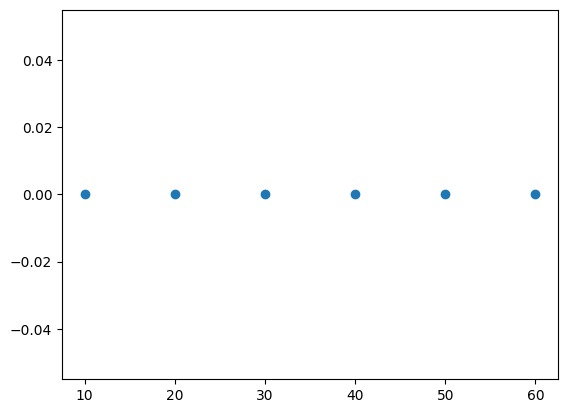

In [24]:
import matplotlib.pyplot as plt
plt.scatter(data,np.zeros_like(data))
plt.show()

In [25]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df['sepal_length'].max() - df['sepal_length'].min()

np.float64(3.6000000000000005)

In [53]:
list(df.columns[0:4])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
for i in list(df.columns[0:3]):
    ch_df =  df[i].max() - df[i].min()
    print(ch_df)

3.6000000000000005
2.4000000000000004
5.9


변동성이 가장 큰 속성은 petal_length 입니다.
petal_length가 다른 속성보다 상대적으로 가장 큽니다.

모델 생성시에 다루어야 하는 속성으로 볼 수 있습니다.

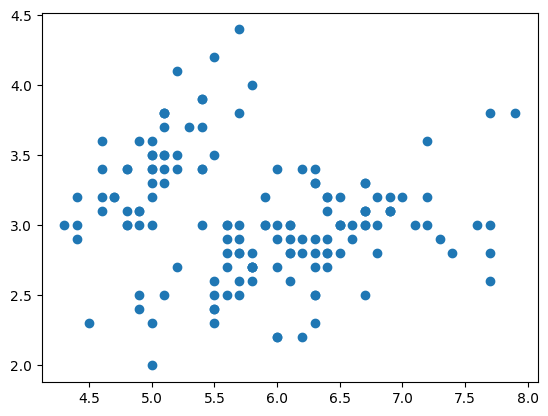

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.show()

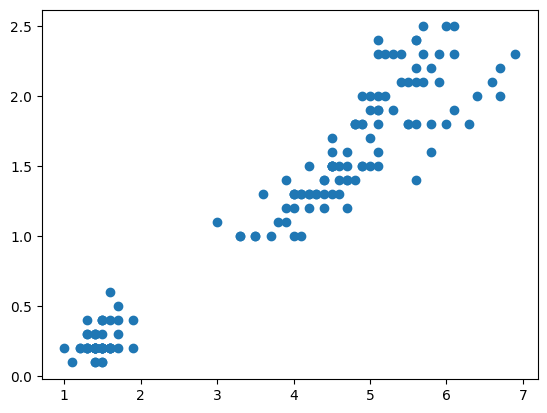

In [38]:
plt.scatter(df['petal_length'],df['petal_width'])
plt.show()

In [41]:
# 분산: 평균에서 떨어져있는 정도
data = [10, 20, 30, 40, 50]
var_value = np.var(data)
print(var_value)  

200.0


9.833039381322154


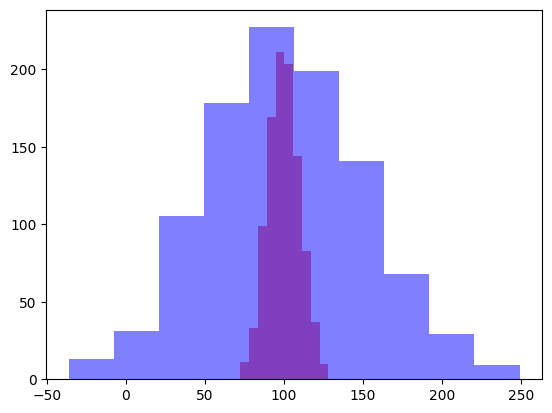

In [ ]:
mu = 100
sd1 = 10
sd2 = 50

data1 =np.random.normal(mu,sd1,1000)
data2 =np.random.normal(mu,sd2,1000)

plt.hist(data1, bins = 10,color= 'red',alpha=0.5)
plt.hist(data2, bins = 10,color= 'blue',alpha=0.5)

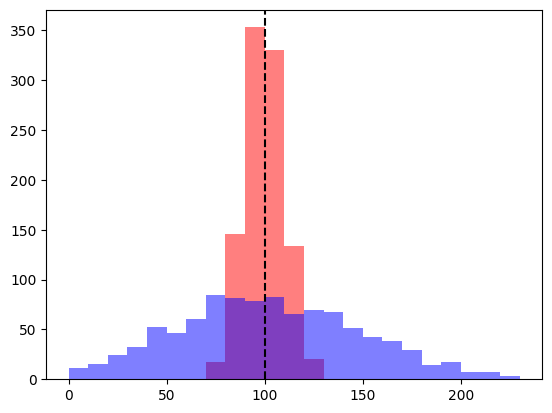

In [68]:
bins = np.arange(0,240, 10)
plt.hist(data1, bins=bins, color='red', alpha=0.5)
plt.hist(data2, bins=bins, color='blue', alpha=0.5)

#평균선 표시
plt.axvline(mu, color='black', linestyle='--')

In [61]:
# iris 각 속성들의 표준편차 비교분석
ch_df=[]
for i in list(df.columns[0:4]):
    a =  np.std(df[i])
    ch_df.append(a)

In [62]:
print(list(ch_df))

[np.float64(0.8253012917851409), np.float64(0.4344109677354946), np.float64(1.759404065775303), np.float64(0.7596926279021594)]


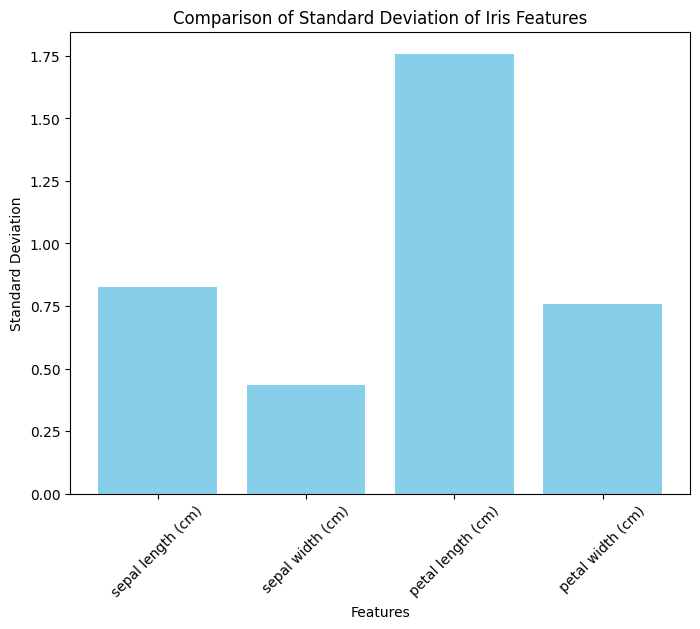

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(df.columns[0:4], ch_df, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.title('Comparison of Standard Deviation of Iris Features')
plt.show()

In [69]:
# 가장 분산이 큰 변수: petal_length
# 가장 분산이 작은 변수: sepal_length
# 분산이 큰 변수가 민감하게 작용할 것이다. 식별력이 크다
# IQR이 크다 -> 이상치의 허용범위가 크다.

# 분포의 모양, 형태
- 모양이 정규분포인지
- 치우쳐져 있는가/ 좌,우/위,아래
- 특이한 패턴이 있는가/ 쌍봉

In [71]:
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

- 각 변수의 분포 형태: 5개의 변수
- 값의 범위, 도수가 많은 구간(count)빈도
- 이상치 유무

In [73]:
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


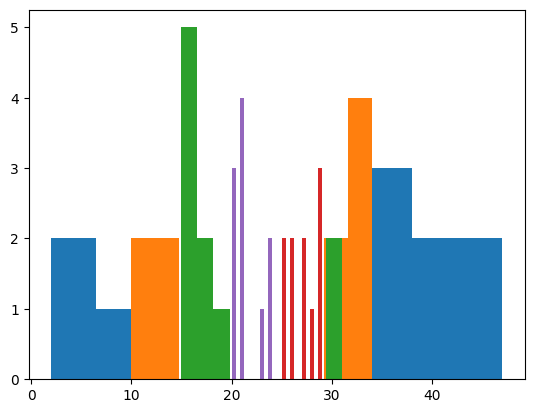

In [75]:
for col in df.columns:
    plt.hist(df[col])

In [ ]:
from scipy.stats import kurtosis

# 첨도: 분포의 뽀족함과 꼬리의 두꺼움을 측정하는 지표
# 첨도가 0일때 기준으로 뽀족하면 양수, 완만하면 음수이다.
# 첨도가 0 일 떄 : 정규분포

kurtosis_value = kurtosis(data)
print(kurtosis_value)

-0.2120000000000002


양수 첨도: 정규분포보다 그만큼 뾰족하다 > 꼬리가 두껍다
(길다)
음수 첨도: 정규분포보다 그만큼 눌려있다 > 꼬리가 얇다
(짧다) 데이터가 평균주변에 고르다

In [ ]:
from  scipy import stats
# 표본 데이터 (30명)
coffee_data = [2.9, 2.4, 2.7, 3.0, 2.6, 2.8, 2.9, 3.1, 2.7, 2.6,
               2.8, 2.5, 3.2, 3.0, 2.4, 2.6, 2.7, 3.1, 2.8, 2.7,
               2.5, 2.9, 2.6, 2.8, 2.9, 2.5, 2.7, 2.8, 3.0, 2.9]

# 단일표본 t-검정
t_stat, p_value = stats.ttest_1samp(coffee_data, popmean=2.5)

print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")

# t 통계량: 표준오차의 7배라고 할 수 있음

t값 = 7.031, p값 = 0.000


In [ ]:
# 이표본 (독립표본) t-가설검정: 두개의 평균이 유의미 한가?
group_A = [78, 85, 82, 88, 76, 81, 79, 84, 82, 80]
group_B = [72, 75, 78, 74, 71, 77, 70, 76, 75, 73]

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")

# 귀무가설: 두 그룹의 평균이 동일하다.
# 대립가설: 두 그룹의 평균이 동일하지 않다.
# p값은 0.00으로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
# 즉, 두 그룹의 평균이 동일하지 않을 가능성이 높다.
# t통계량을 보니 표준오차의 5배 정도 차이가 난다.
if p_value > 0.05 :
    print('유의수준 0.05보다 크므로 귀무가설을 채택한다.')
else: 
    print("0.05보다 작으므로 귀무가설을 기각한다.")

t값 = 5.331, p값 = 0.000
0.05보다 작으므로 귀무가설을 기각한다.


In [9]:
# 대응 표본 t-검정 예제: 약물 투여 전후 혈압 비교
before = [120, 122, 143, 130, 135, 118, 127, 140, 132, 125]
after = [115, 117, 138, 125, 129, 112, 120, 135, 126, 119]

t_stat, p_value = stats.ttest_rel(before, after)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")

# 귀무가설: 약물 투여 전과 후의 혈압의 차이가 없다.
# 대립가설: 약물 투여 전과 후의 혈압의 차이가 있다.
# p값은 0.00 으로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
if p_value > 0.05 :
    print('유의수준 0.05보다 크므로 귀무가설을 채택한다.')
else: 
    print("0.05보다 작으므로 귀무가설을 기각한다.")
# 즉, 약물 투여 전과 후의 혈압의 차이가 있을 가능성이 있다.


t값 = 25.327, p값 = 0.000
0.05보다 작으므로 귀무가설을 기각한다.


In [12]:
import numpy as np
obs = np.array([[40, 10],  # 남자 (좋아함, 안좋아함) 교차표
                [30, 20]]) # 여자

chi2, p, dof, expected = stats.chi2_contingency(obs)
print(f"chi2 = {chi2:.3f}, p값 = {p:.10f}")

# 귀무가설: 성별에 따른 커피의 선호도가 관련이 없다.
# 대립가설: 성별에 따른 커피의 선호도가 관련이 있다.

if p_value > 0.05 :
    print('유의수준 0.05보다 크므로 귀무가설을 채택한다.')
else: 
    print("0.05보다 작으므로 귀무가설을 기각한다.")
# 즉, 성별에 따른 커피의 선호도가 관련이 있다.

chi2 = 3.857, p값 = 0.0495346134
0.05보다 작으므로 귀무가설을 기각한다.


In [ ]:
from scipy.stats import f_oneway

# 세 그룹의 점수
group1 = [80, 85, 90]
group2 = [70, 75, 78]
group3 = [60, 65, 62]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F값: {f_stat:.2f}, p값: {p_value:.4f}")

# 귀무가설: 세 개의 그룹의 평균은 차이가 없다.(같다)
# 대립가설: 세 개의 그룹의 평균은 차이가 있다.(다르다)
# p값이 0.05보다 작으므로 귀무가설을 기각한다.
# 따라서, 세 개의 그룹간의 평균의 차이가 있을 가능성이 있다.

F값: 24.28, p값: 0.0013


In [16]:
# 확률의 계산
# 동전 던지기
space = ['앞면','뒷면']
event = ['앞면']

prob = lambda event,space : len(event)/len(space)
prob(event,space)

0.5

In [ ]:
# 주사위 던지기
# 1번 던져서 3이 나올 확률
space = [1,2,3,4,5,6]
event = [3]

prob(event, space)

0.16666666666666666

In [21]:
# 확률의 덧셈
## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률
space = {1,2,3,4,5,6}
event_1 = {2,4,6}
event_2 = {5,6}

# 합집합
합집합 = event_1 | event_2

합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률 = 합집합의갯수/전체경우의수
print(확률)

0.6666666666666666


In [22]:
## 2이하이거나 5이상인 눈이나올 확률
# 확률의 덧셈
## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률
space = {1,2,3,4,5,6}
event_1 = {1,2}
event_2 = {5,6}

# 합집합
합집합 = event_1 | event_2

합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률 = 합집합의갯수/전체경우의수
print(확률)

0.6666666666666666


In [23]:
# 조건부확률
sample_space = [1,2,3,4,5,6]
event_1 = [2,4,6]
event_2 = [2]
p_a = len(event_1)/len(sample_space)
p_b = len(event_2)/len(sample_space)
p_b_and_p_a = set(event_1) & set(event_2)
p_banda = len(p_b_and_p_a)/len(sample_space)

In [24]:
p_banda

0.16666666666666666

In [ ]:
# 우도와 확률값
# 동전 10번 던지고, 8번 앞면이 나왔다.
# 우도: 관측된 데이터가 주어진 모수 하에서 얼마나 가능성 있게 나타날지를 나타내는 값
from scipy.stats import binom
n=10
k = 8 # 앞면의갯수

# 가설 1
p1 = 0.5 # 앞면이 나올 확률과 뒷면이 나올 확률이 동일할 때
p1_likelihod = binom.pmf(k,n,p1)

# 가설 2
p2 = 0.8
p2_likelihod = binom.pmf(k,n,p2)

print(p1_likelihod,p2_likelihod)


0.04394531250000005 0.30198988799999993


가설1의 경우: 앞면이 8번 나올 확률은 4.4%

가설2의 경우: 앞면이 8번 나올 확률은 30.2%

앞면8번 나오는 관측값은 P = 0.8인 모델이 더 잘 설명한다.(우도가 더 크다)

-> 우도가 0.8이라고 하는 것이 0.5라고 하는 것보다 그 데이터(앞면이8번)를 더 자연스럽게 설명한다.

In [26]:
x_value = [1,2,3]
p_x = [1/6,3/6,2/6]

exp_value = 0
# 기댓값
for i in range(len(x_value)):
    exp_value += x_value[i] * p_x[i]
    
print(exp_value)

2.166666666666667


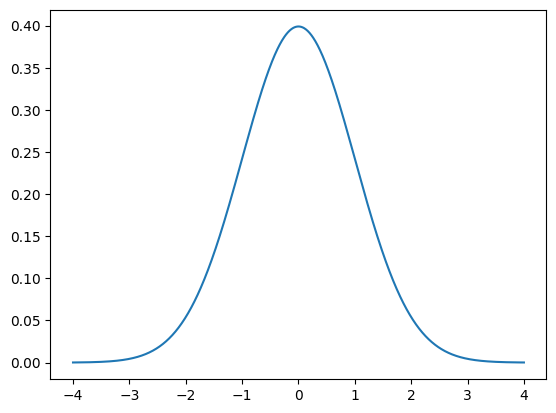

In [29]:
from scipy.stats import norm
import matplotlib.pyplot as plt
mu = 0
sigma = 1

x = np.linspace(-4,4,1000)
y = norm.pdf(x,loc= mu,scale= sigma)

plt.plot(x,y)
plt.show()

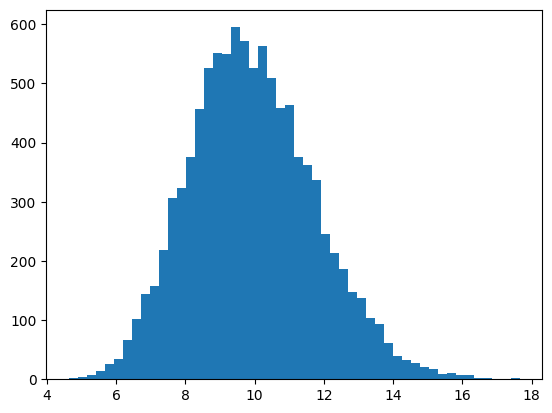

In [31]:
# 표집분포
np.random.seed(0)
X_pop = np.random.exponential(scale= 10, size= 10000)
sample_mean = [np.mean(np.random.choice(X_pop,size=30)) for _ in range(10000)]

plt.hist(sample_mean, bins=50)
plt.show()

In [ ]:
mu = 100
sigma = 10

x1 = 110
x2 = 125

z_x1 = (x1-mu)/sigma
z_x2 = (x2-mu)/sigma

print(z_x1,z_x2)

# z값의 분포값을 비교하면 둘 사이에 15% 정도가 있음.

1.0 2.5


In [33]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
print(diff_area)

0.15244558860568092


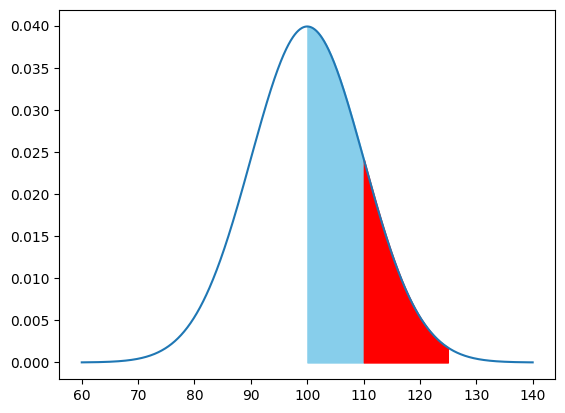

In [35]:
# 시각화
x = np.linspace(mu -4 *sigma, mu+4*sigma, 1000)
y = norm.pdf(x,mu,sigma)
plt.plot(x,y)
plt.fill_between(x,y,where=(x>=100)&(x<=110), color = 'skyblue')
plt.fill_between(x,y,where=(x>110)&(x<=125), color = 'red')
plt.show()

In [39]:
# 이산확률분포
## 기댓값
import pandas as pd
data = {'상금':[0,100,1000] # X
        ,'확률':[0.5,0.3,0.2] } # FX

df = pd.DataFrame(data)
df['exp_value'] = df['상금'] * df["확률"]
print(f'복권의 기대값:{df['exp_value'].sum()}원')

복권의 기대값:230.0원


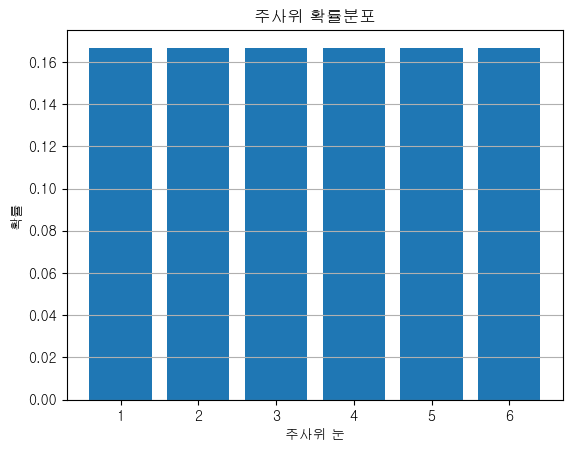

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주사위 눈 (1~6)
x = np.arange(1, 7)
# 공정한 주사위의 확률분포: 모두 1/6
probs = [1/6] * 6  #6을 곱하는 이유는  6번 반복해서 리스트로 만든다는 의미 - 각 눈별로 확률이 동일하므로 모두 1/6로 설정

from matplotlib import rcParams  # 폰트지정
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

# 시각화
plt.bar(x, probs)
plt.xticks(x)
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 확률분포")
plt.grid(axis='y')
plt.show()

동전 1회 던지기 결과: 뒷면
1000번 던졌을 때 앞면 나온 횟수: 508
앞면 나올 확률 (이론값: 0.5, 실험값: 0.5080)


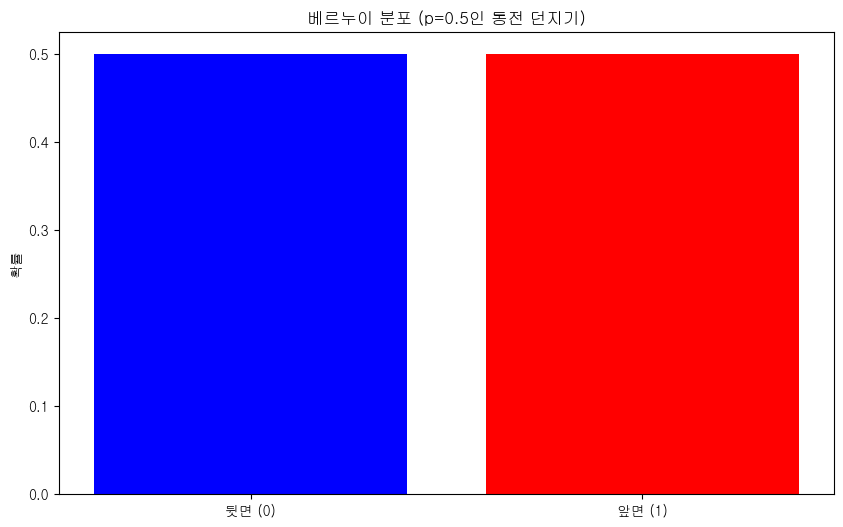

In [ ]:
# 베르누이 분포 예시 - 동전 던지기
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 베르누이 분포 파라미터 설정
p = 0.5  # 앞면이 나올 확률

# 베르누이 확률변수 생성
X = bernoulli(p) # 베르누이 확률 모델

# 1회 시행 결과 시뮬레이션 (0: 뒷면, 1: 앞면)
result = X.rvs(size=1)
print(f"동전 1회 던지기 결과: {'앞면' if result[0] == 1 else '뒷면'}")

# 여러 번 시행 결과 시뮬레이션
n_trials = 1000
results = X.rvs(size=n_trials)

# 결과 분석
success_count = np.sum(results)
success_rate = success_count / n_trials

print(f"1000번 던졌을 때 앞면 나온 횟수: {success_count}")
print(f"앞면 나올 확률 (이론값: {p}, 실험값: {success_rate:.4f})")

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([0, 1], [1-p, p], color=['blue', 'red'])
plt.xticks([0, 1], ['뒷면 (0)', '앞면 (1)'])
plt.ylabel('확률')
plt.title('베르누이 분포 (p=0.5인 동전 던지기)')
plt.show()


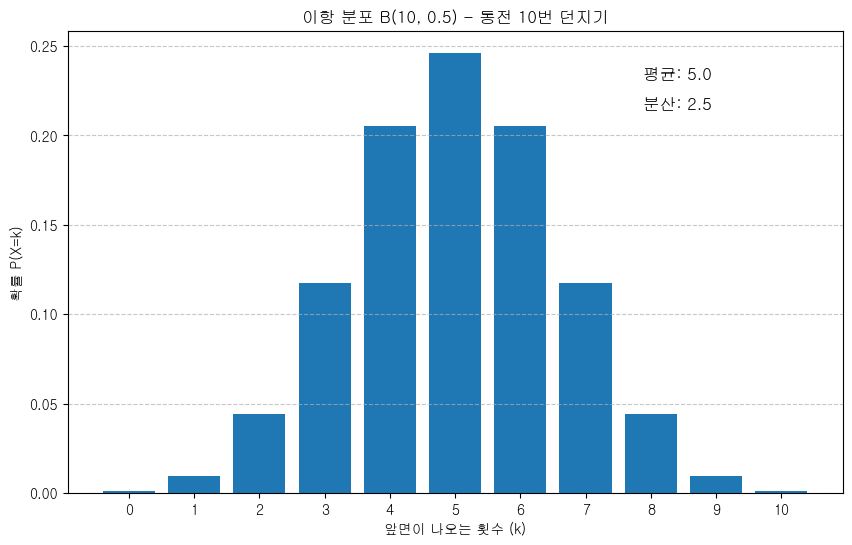

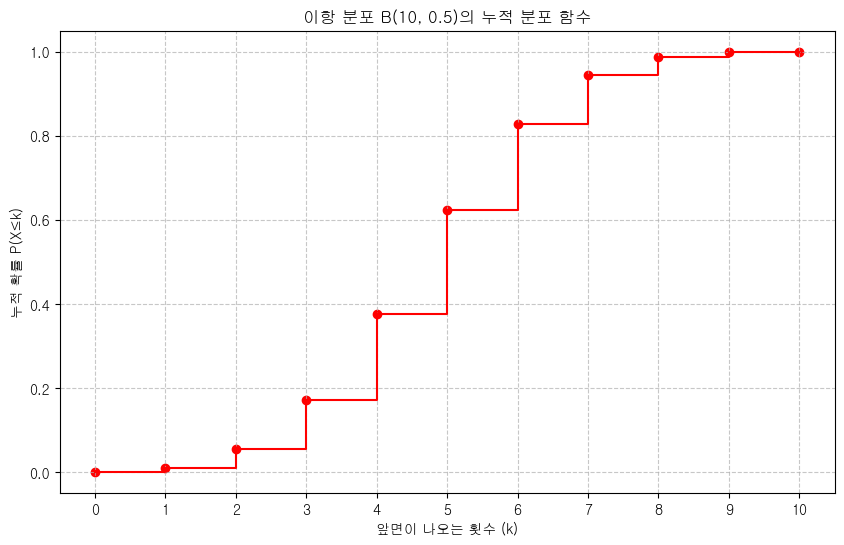

In [41]:
# 이항 분포 예시 - 동전 10번 던지기
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 이항 분포 파라미터 설정
n = 10  # 시행 횟수
p = 0.5  # 성공 확률(동전 앞면이 나올 확률)

# 이항 확률변수 생성
X = binom(n, p)

# 가능한 모든 결과값(0부터 n까지)
k_values = np.arange(0, n+1)

# 각 결과값의 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('확률 P(X=k)')
plt.title(f'이항 분포 B({n}, {p}) - 동전 10번 던지기')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균과 분산 출력
mean = n * p
var = n * p * (1-p)
plt.figtext(0.7, 0.8, f'평균: {mean}', fontsize=12)
plt.figtext(0.7, 0.75, f'분산: {var}', fontsize=12)

plt.show()

# 누적 분포 함수(CDF) 계산 및 시각화
cdf_values = X.cdf(k_values)

plt.figure(figsize=(10, 6))
plt.step(k_values, cdf_values, where='post', color='red')
plt.scatter(k_values, cdf_values, color='red')
plt.xlabel('앞면이 나오는 횟수 (k)')
plt.ylabel('누적 확률 P(X≤k)')
plt.title(f'이항 분포 B({n}, {p})의 누적 분포 함수')
plt.xticks(k_values)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


# 이항분포를 적용할 수 있는 사례
1. 시험 합격률이 70%, 100명, 80명 이상 합격할 확률
2. 불량율이 5%, 20개 샘플, 불량제품이 2개 이하일 확률



In [ ]:
from scipy.stats import binom # 이항분포 관련된 함수 IMPORT

# 파라미터
n = 100   # 총 인원(시행횟수)
p = 0.7   # 합격 확률(성공 확률)
k = 80    # 최소 합격 인원

# 누적 확률: P(X <= 79), 어떤 확률 변수X가 특정값 x이하일 확률을 나타내는 함수
prob_less_than_80 = binom.cdf(k - 1, n, p)

# P(X >= 80) = 1 - P(X <= 79)
prob_80_or_more = 1 - prob_less_than_80

print(f"100명 중 80명 이상이 합격할 확률: {prob_80_or_more:.4f}")

100명 중 80명 이상이 합격할 확률: 0.0165


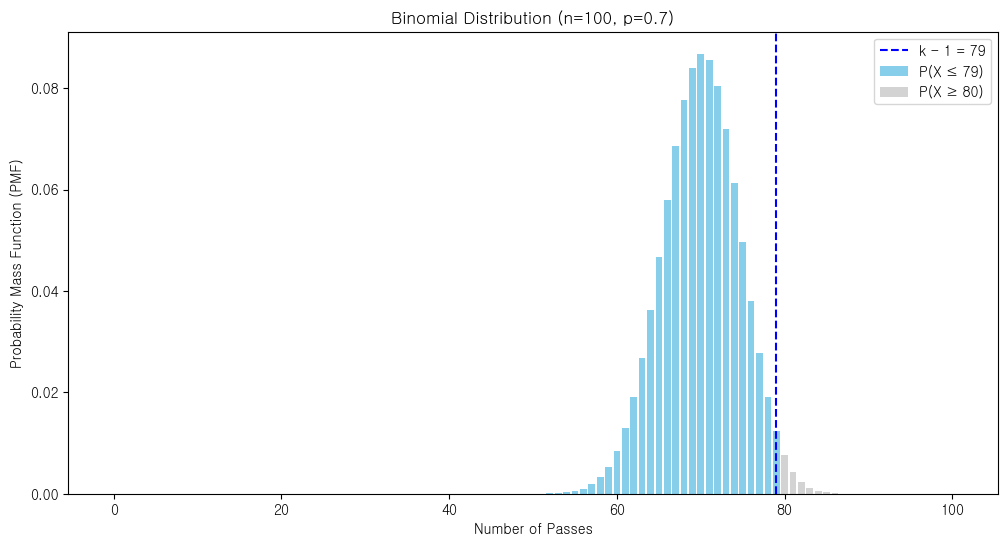

P(X ≤ 79) = 0.9835
P(X ≥ 80) = 0.0165


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 파라미터 설정
n = 100   # 총 인원
p = 0.7   # 합격 확률
k = 80    # 최소 합격 인원

# 확률 변수 X 값 범위
x = np.arange(0, n + 1) # 0(전부 불합격)~ 100(전부 합격)

# 이항분포 확률 질량 함수(PMF)
pmf = binom.pmf(x, n, p) # 특정 값 하나에 대한 확률

# P(X <= k - 1) 영역
highlight = x <= (k - 1) # 0~79

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x[highlight], pmf[highlight], color='skyblue', label=f'P(X ≤ {k - 1})')
plt.bar(x[~highlight], pmf[~highlight], color='lightgray', label=f'P(X ≥ {k})')

# k-1 위치 점선 표시
plt.axvline(k - 1, color='blue', linestyle='--', label=f'k - 1 = {k - 1}')

# 그래프 제목, 라벨, 범례
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Passes')
plt.ylabel('Probability Mass Function (PMF)')
plt.legend()
plt.show()

# 실제 누적 확률 계산
prob_less_than_k = binom.cdf(k - 1, n, p)
prob_greater_equal_k = 1 - prob_less_than_k

print(f"P(X ≤ {k-1}) = {prob_less_than_k:.4f}")
print(f"P(X ≥ {k}) = {prob_greater_equal_k:.4f}")


In [46]:
from scipy.stats import binom

# 파라미터
n = 20   # 샘플 수
p = 0.05 # 불량품일 확률
k = 2    # 최대 불량품 개수

# 누적 확률: P(X <= 2)
prob_2_or_less = binom.cdf(k, n, p)

print(f"20개 샘플에서 불량품이 2개 이하일 확률: {prob_2_or_less:.4f}")

20개 샘플에서 불량품이 2개 이하일 확률: 0.9245


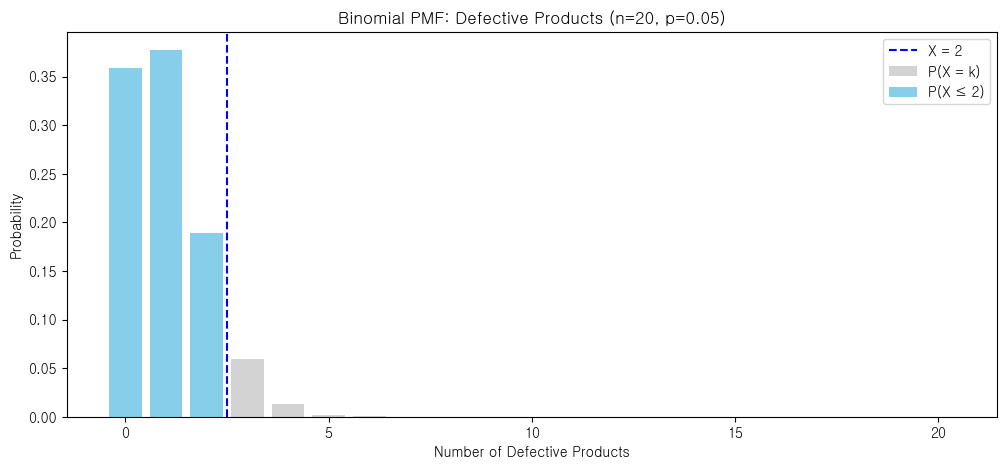

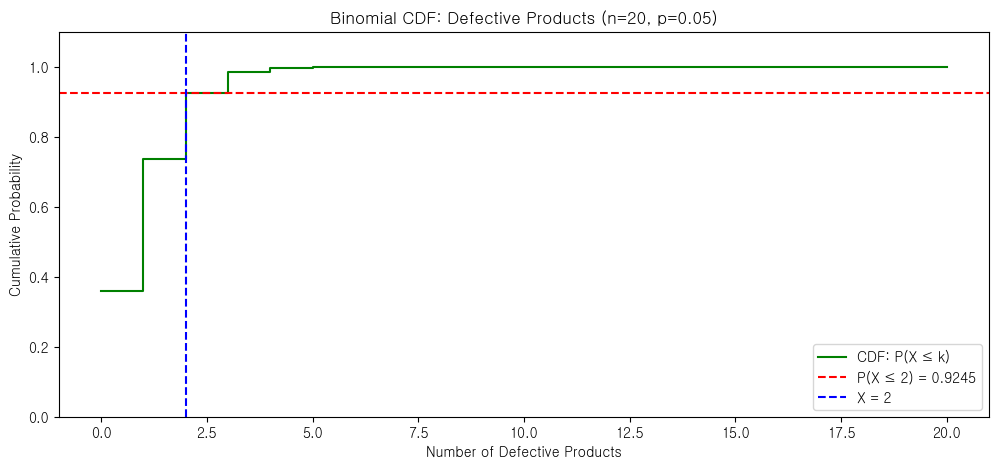

20개 샘플에서 불량품이 2개 이하일 확률: 0.9245


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 파라미터
n = 20    # 샘플 수
p = 0.05  # 불량 확률
k = 2     # 최대 불량 개수

# X 값: 0 ~ n
x = np.arange(0, n + 1)

# PMF: 확률질량함수
pmf = binom.pmf(x, n, p)

# CDF: 누적확률
cdf = binom.cdf(x, n, p)

# 1) PMF 그래프
plt.figure(figsize=(12, 5))
plt.bar(x, pmf, color='lightgray', label='P(X = k)')
plt.bar(x[x <= k], pmf[x <= k], color='skyblue', label=f'P(X ≤ {k})')
plt.axvline(k + 0.5, color='blue', linestyle='--', label=f'X = {k}')
plt.title('Binomial PMF: Defective Products (n=20, p=0.05)')
plt.xlabel('Number of Defective Products')
plt.ylabel('Probability')
plt.legend()
plt.show()

# 2) CDF 그래프
plt.figure(figsize=(12, 5))
plt.step(x, cdf, where='post', color='green', label='CDF: P(X ≤ k)')
plt.axhline(binom.cdf(k, n, p), color='red', linestyle='--', label=f'P(X ≤ {k}) = {cdf[k]:.4f}')
plt.axvline(k, color='blue', linestyle='--', label=f'X = {k}')
plt.title('Binomial CDF: Defective Products (n=20, p=0.05)')
plt.xlabel('Number of Defective Products')
plt.ylabel('Cumulative Probability')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

# 결과 출력
print(f"20개 샘플에서 불량품이 2개 이하일 확률: {prob_2_or_less:.4f}")



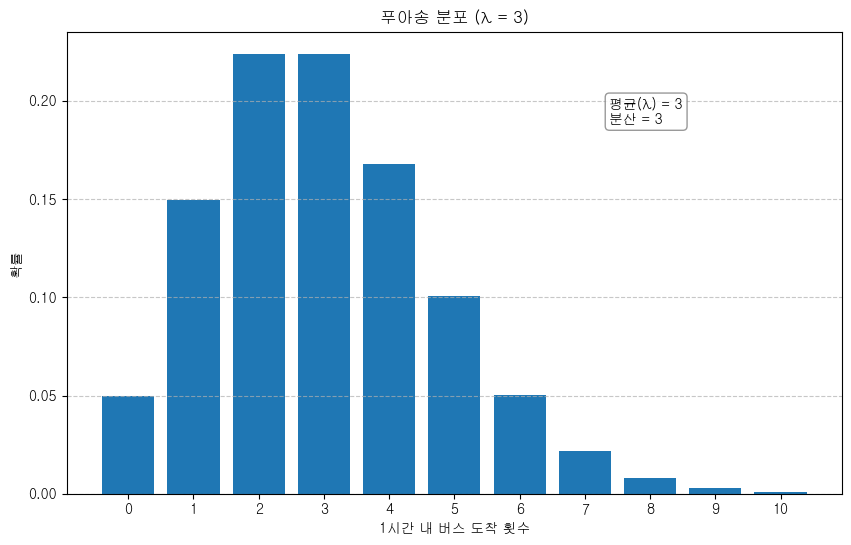

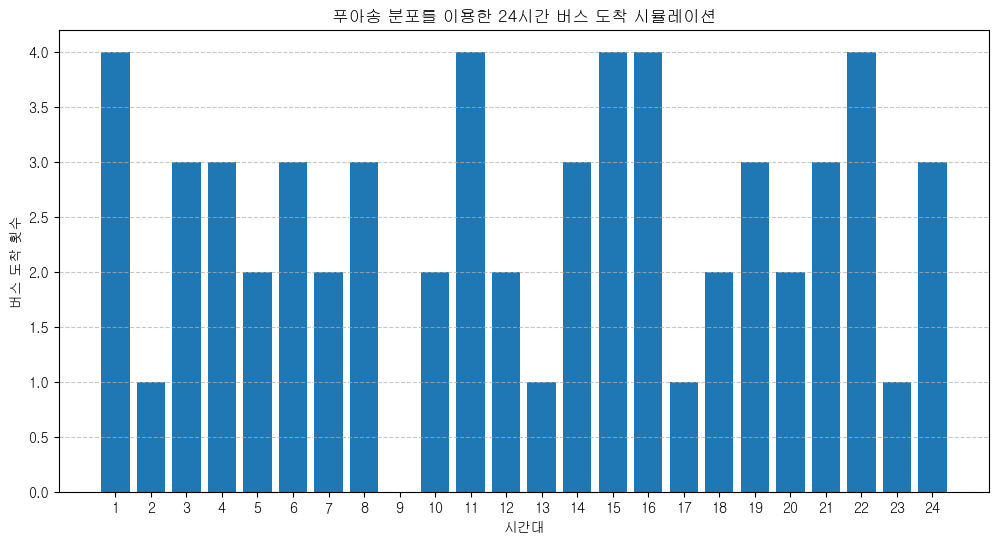

In [42]:
# 푸아송 분포 - 버스 도착 시뮬레이션
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 파라미터 설정
lambda_val = 3  # 1시간당 평균 버스 도착 횟수

# 푸아송 확률변수 생성
X = poisson(lambda_val)

# 가능한 버스 도착 횟수 (0부터 10까지)
k_values = np.arange(0, 11)

# 각 값에 대한 확률 계산
pmf_values = X.pmf(k_values)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values)
plt.xlabel('1시간 내 버스 도착 횟수')
plt.ylabel('확률')
plt.title(f'푸아송 분포 (λ = {lambda_val})')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균과 분산 표시
plt.annotate(f'평균(λ) = {lambda_val}\n분산 = {lambda_val}', 
             xy=(0.7, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

# 시뮬레이션: 하루(24시간) 동안의 버스 도착 패턴
np.random.seed(42)
hours = np.arange(1, 25)
arrivals = np.random.poisson(lambda_val, size=24)

plt.figure(figsize=(12, 6))
plt.bar(hours, arrivals)
plt.xlabel('시간대')
plt.ylabel('버스 도착 횟수')
plt.title('푸아송 분포를 이용한 24시간 버스 도착 시뮬레이션')
plt.xticks(hours)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

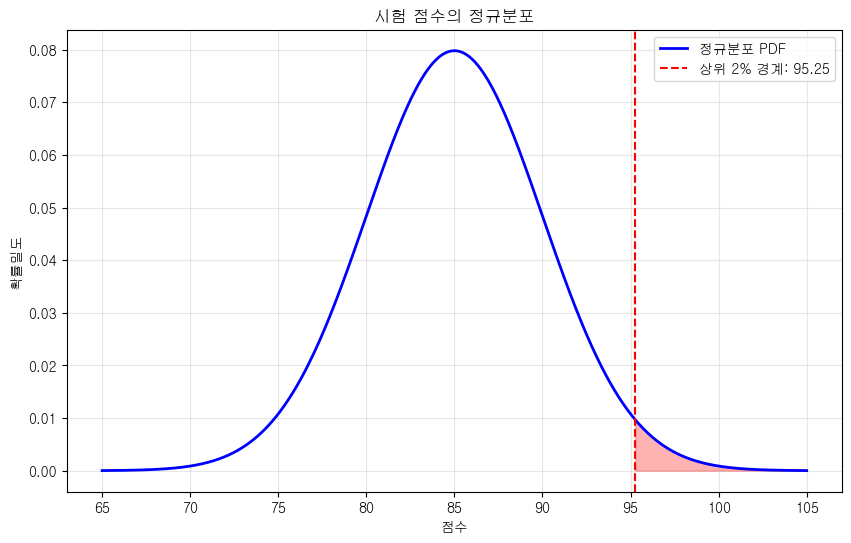

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 정규분포 예시 코드
mu = 85  # 평균
sigma = 5  # 표준편차

# 정규분포의 확률밀도함수
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# 상위 2%에 해당하는 점수 계산
z_score = 2.05
critical_value = mu + z_score * sigma

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', lw=2, label='정규분포 PDF')
plt.axvline(critical_value, color='r', linestyle='--', label=f'상위 2% 경계: {critical_value:.2f}')
plt.fill_between(x, pdf, where=(x >= critical_value), alpha=0.3, color='r')

# 그래프 꾸미기
plt.title('시험 점수의 정규분포')
plt.xlabel('점수')
plt.ylabel('확률밀도')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
# 카이제곱 분포에서 적합도, 독립성 검정
# 귀무가설: 범주 간 차이가 없다.
# 대립가설: 범주 간 차이가 있다. 샘플링한 그룹에 편향이 있을 수 있다. 적합도가 떨어진다.

# 카이제곱 통계량 > 관측값과 기대값의 차이를 수치화

이산확률 분포 
- 베르누이: 성공|실패
- 이항분포: 횟수, 성공의 횟수를 모델링
- 포아송분포: 단위(시간/공간)내에서 사건의 발생횟수를 모델링, 평균 발생률
- 가하분포, 초기하분포,다항분포

연속확률 분포
- 정규분포: 평균 중심 - 좌우대칭, 평균/표준편차
- 표준정규분포: 평균0, 표편1인 정규분포 -> z 점수로 확률값을 확인
- 카이제곱분포: x값의 제곱의 합, 분산을 분포로 표시 -> 적합도/동질성/분산(변동성), 자유도가 높아질 수록 정규분포화
- F분포: 두 분산의 비율을 비교,ANOVA가 3개 이상의 분산을 비교

기계학습
- 분류, 회귀 : 방정식/ 오차> 정규분포
- 시뮬레이션: X값을 추출